<a href="https://colab.research.google.com/github/rachit-shah/Apparent-Age-Prediction-using-CNN/blob/master/hw2q5_naivebayes_using_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving hw2q5.csv to hw2q5.csv
User uploaded file "hw2q5.csv" with length 991 bytes


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
import itertools
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing

In [0]:
df = pd.read_csv('hw2q5.csv')
df

,Id,patient age,spectacle prescription,astigmatic,tear production rate,Class
0,1,young,myope,no,reduced,No
1,2,young,myope,no,normal,Yes
2,3,young,myope,yes,reduced,No
3,4,young,myope,yes,normal,Yes
4,5,young,hypermetrope,no,reduced,No
5,6,young,hypermetrope,no,normal,Yes
6,7,young,hypermetrope,yes,reduced,No
7,8,young,hypermetrope,yes,normal,Yes
8,9,pre-presbyopic,myope,no,reduced,No
9,10,pre-presbyopic,myope,no,normal,Yes


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


Confusion matrix, without normalization
[[2 0]
 [0 2]]
Confusion matrix, without normalization
[[3 1]
 [0 1]]
Confusion matrix, without normalization
[[2 0]
 [0 3]]
Confusion matrix, without normalization
[[3 1]
 [0 1]]
Confusion matrix, without normalization
[[2 1]
 [0 2]]
Average Accuracy over 5-folds=0.8799999999999999


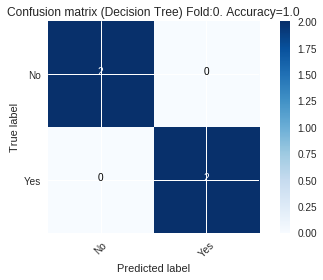

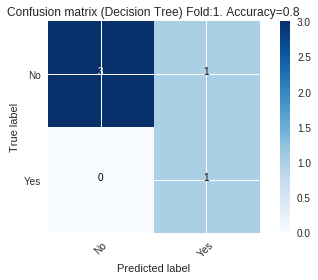

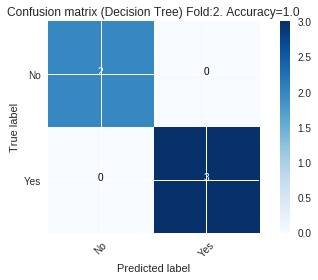

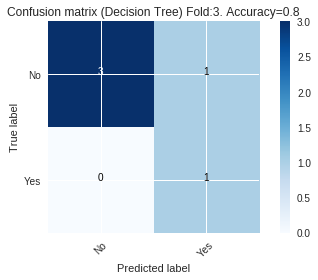

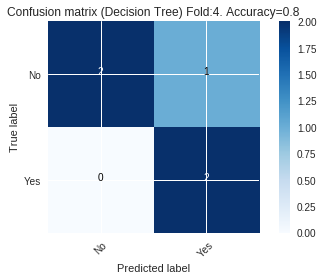

In [0]:
avgAccuracy=0
for k in range(0,5):
  test_data = df[df["Id"]%5==k]
  test_dataX = test_data.drop(columns="Class")
  test_dataY = test_data["Class"]
  train_data = df[df["Id"]%5!=k]
  train_dataX = train_data.drop(columns="Class")
  train_dataY = train_data["Class"]
  le = preprocessing.LabelEncoder()
  train_dataX = train_dataX.apply(le.fit_transform)
  test_dataX = test_dataX.apply(le.fit_transform)
  model = GaussianNB()
  model.fit(train_dataX, train_dataY)
  predictedClass = []
  for x in range(0,len(test_data)):
    predictedClass.append(model.predict(test_dataX.iloc[x].reshape(1,-1)))
  cnf_matrix = confusion_matrix(test_dataY, predictedClass)
  plt.figure()
  accuracy = accuracy_score(test_dataY, predictedClass)
  avgAccuracy = avgAccuracy + accuracy
  plot_confusion_matrix(cnf_matrix, classes=["No","Yes"],title='Confusion matrix (Decision Tree) Fold:'+str(k)+'. Accuracy='+str(accuracy))

print("Average Accuracy over 5-folds="+str(avgAccuracy/5))